# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

# Data Loading

In [2]:
# Loading the data
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# data shape check
data.shape

(200, 5)

# Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# missing value check
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# Duplicates check
data.duplicated().sum()

0

In [7]:
# Data types check
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
# Numerical variable description
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
# Categorical variable description
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

The range of data can be observed to be reasonable.

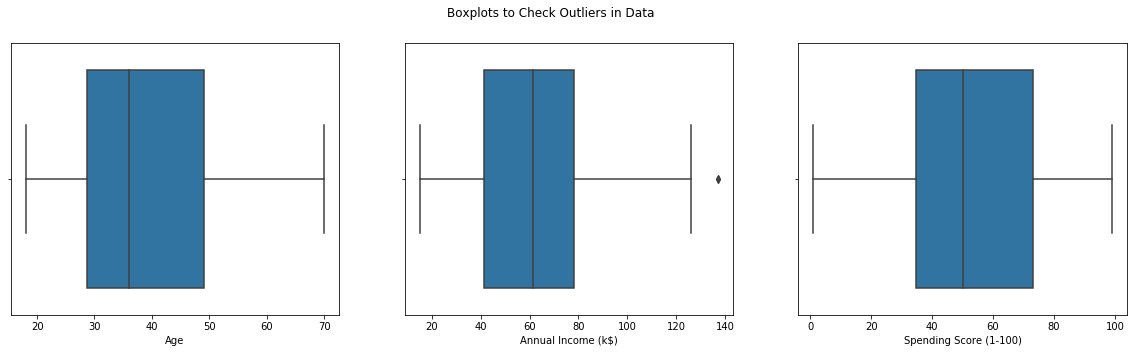

In [10]:
# Outliers check by using boxplot
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in range(len(cols)):
    sns.boxplot(data[cols[i]], ax=axs[i])
fig.suptitle('Boxplots to Check Outliers in Data')
plt.show()

There are no significant outliers.
Considering all the above results, there is no need of data cleaning.

# Data Visualization

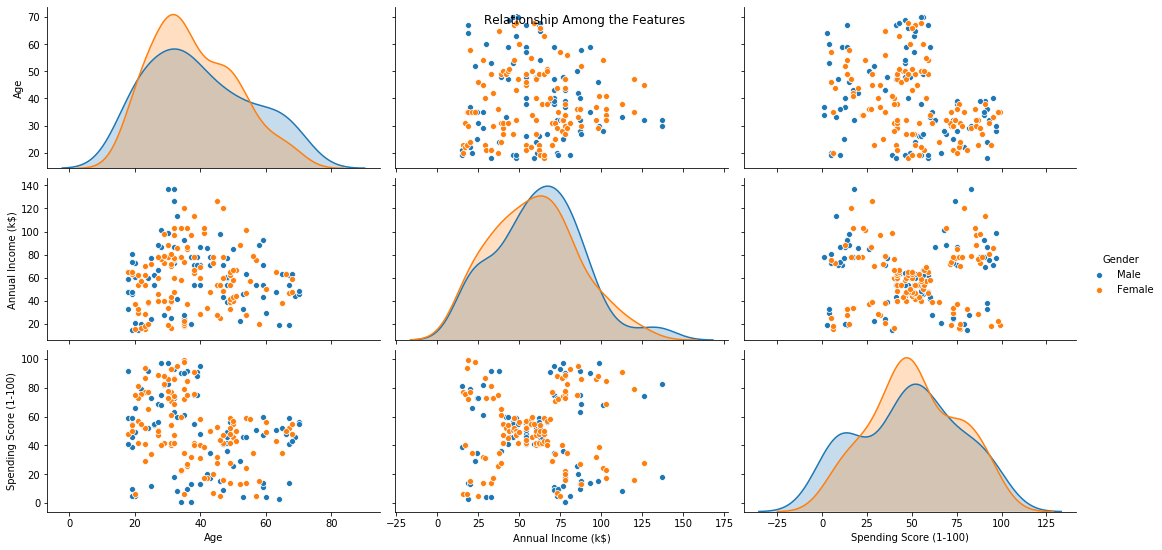

In [11]:
# Relationship among the features
sns.pairplot(data.drop('CustomerID', axis=1), hue='Gender', aspect=2)
plt.suptitle('Relationship Among the Features')
plt.show()

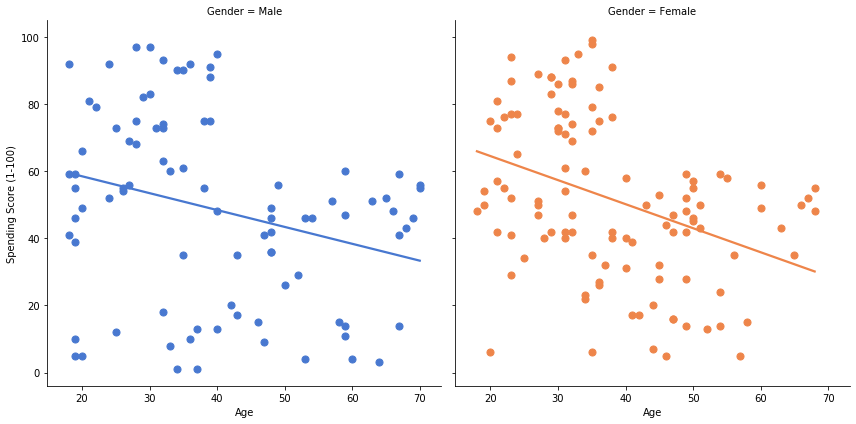

In [12]:
sns.lmplot(x="Age", y="Spending Score (1-100)", col="Gender", hue="Gender", data=data,
           col_wrap=2, ci=None, palette="muted", height=6,
           scatter_kws={"s": 50, "alpha": 1})

We can see that in both genders as Age increase the Spending Score decrease

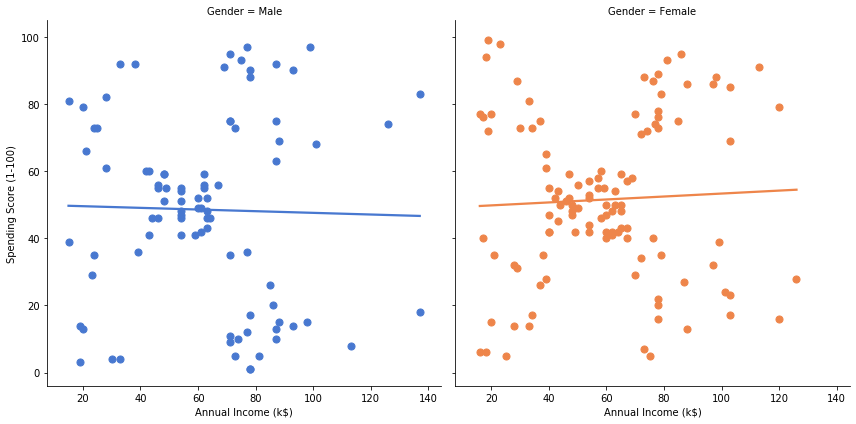

In [13]:
sns.lmplot(x="Annual Income (k$)", y="Spending Score (1-100)", col="Gender", hue="Gender", data=data,
           col_wrap=2, ci=None, palette="muted", height=6,
           scatter_kws={"s": 50, "alpha": 1})

There is no relation between Annual Income and Spending score

<function matplotlib.pyplot.show(*args, **kw)>

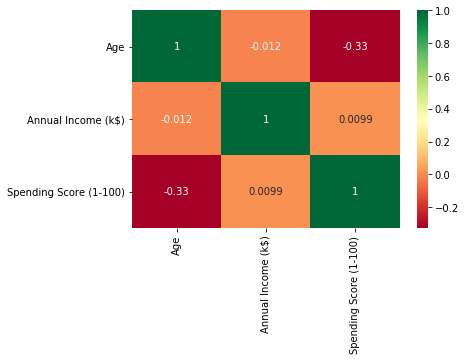

In [14]:
# Hitmap on Dataset
df=data.drop('CustomerID', axis=1)
matrix = df.corr() 
sns.heatmap(matrix, cmap="RdYlGn", annot=True)
plt.show

There is no relation between spending score and Annual incomein both gender also.We can see that there is small negative correlation between Age and Spending Score

# Data Preprocessing

In [15]:
# Feature Selection
data_fs = data.drop(columns='CustomerID')

# Label Encoding
data_encoded = data_fs.replace({'Gender': {'Female':0, 'Male':1}})

# Feature Scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(data_encoded)

X[:10, :]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918],
       [0.        , 0.07692308, 0.01639344, 0.76530612],
       [0.        , 0.32692308, 0.02459016, 0.05102041],
       [0.        , 0.09615385, 0.02459016, 0.94897959],
       [1.        , 0.88461538, 0.03278689, 0.02040816],
       [0.        , 0.23076923, 0.03278689, 0.7244898 ]])

# Modeling
We will use K-Means Clustering and Hierarchical Clustering algorithms.


# K-Means Clustering

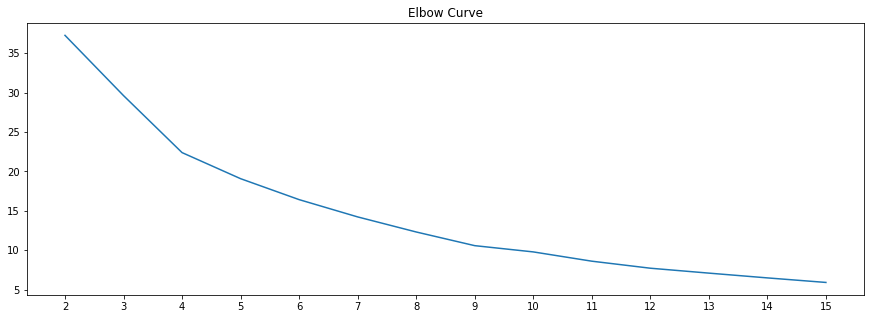

In [16]:
# Elbow Method to identify optimum no. of clusters
inertia = []
range_of_clusters = list(range(2, 16))
for k in range_of_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting Elbow Curve
plt.figure(figsize=(15, 5))
plt.plot(range_of_clusters, inertia)
plt.xticks(range_of_clusters)
plt.title('Elbow Curve')
plt.show()

Considering the above elbow curve, 4 number of clusters will be an optimum choice.

In [17]:
# K-Means Clustering with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Labeling the data
data_kmeans = data.copy()
data_kmeans['Cluster'] = kmeans.labels_
data_kmeans.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3


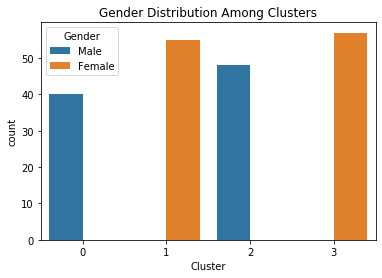

In [18]:
# Categorical variable distribution among clusters
sns.countplot(data=data_kmeans, x='Cluster', hue='Gender')
plt.title('Gender Distribution Among Clusters')
plt.show()

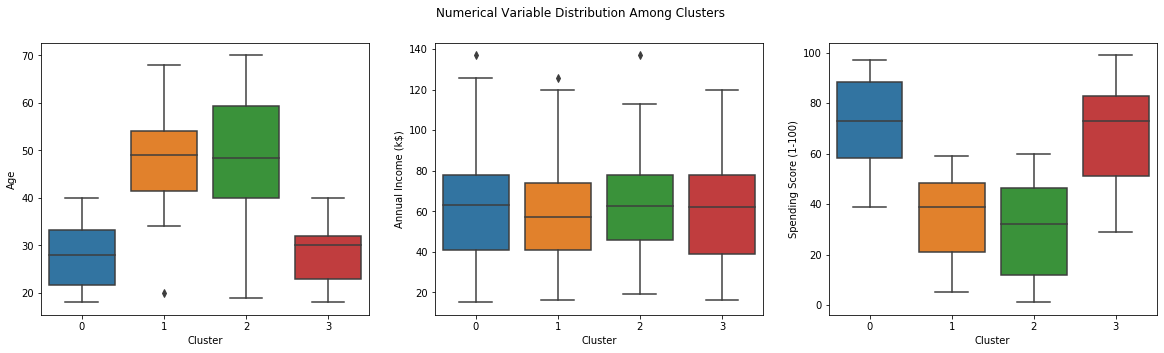

In [19]:
# Numerical variable distribution among clusters
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in range(len(cols)):
    sns.boxplot(data=data_kmeans, x='Cluster', y=cols[i], ax=axs[i])
fig.suptitle('Numerical Variable Distribution Among Clusters')
plt.show()

Cluster Insights:

All the clusters have almost identical annual income distributions.
So, let us analyze customer clusters based on gender, age, and spending score.

Cluster 0: Low age females with high spending score
Cluster 1: Low age males with high spending score
Cluster 2: High age females with low spending score
Cluster 3: High age males with low spending score

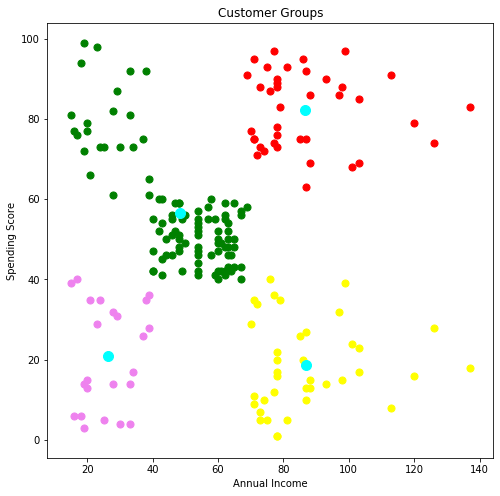

In [21]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=30)
X = data.iloc[:,[3,4]].values
Y = kmeans.fit_predict(X)
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster 0')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Cluster 1')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label='Cluster 2')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='violet',label='Cluster 3')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100, c='cyan',label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

As we can see in the above figure that some person who has greater annual income spends less in Yellow color but some person has greater annual income spend more in Red color

A person having less income and less spen shows in Violet color and having less annual income with high spen in Green color

# Hierarchical Clustering

There are two types of hierarchical clustering: Agglomerative and Divisive. We will use Agglomerative Hierarchical Clustering.

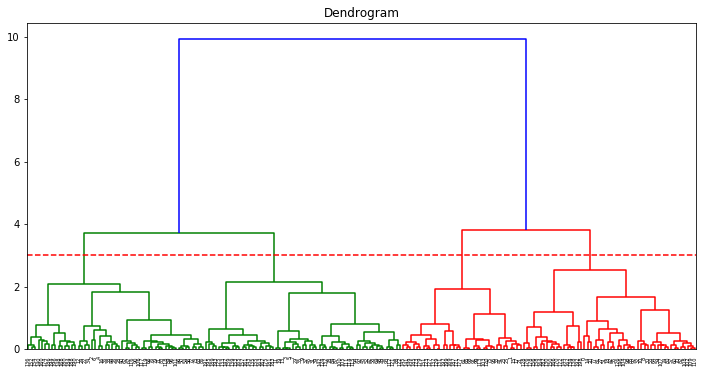

In [31]:
# Plotting dendrogram to identify optimum no. of clusters
mergings = linkage(X, method="ward")
plt.figure(figsize=(12, 6))
dendrogram(mergings)
plt.axhline(y=3, color='r', linestyle='--')
plt.title('Dendrogram')
plt.show()

In [23]:
# Agglomerative clustering with 4 clusters
aggclust = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
aggclust.fit(X)

# Labeling the data
data_agg = data.copy()
data_agg['Cluster'] = aggclust.labels_
data_agg.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


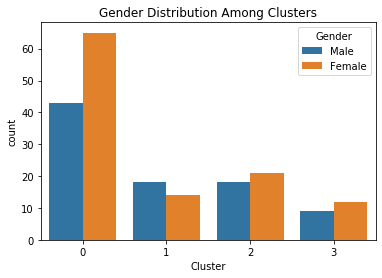

In [24]:
# Categorical variable distribution among clusters
sns.countplot(data=data_agg, x='Cluster', hue='Gender')
plt.title('Gender Distribution Among Clusters')
plt.show()

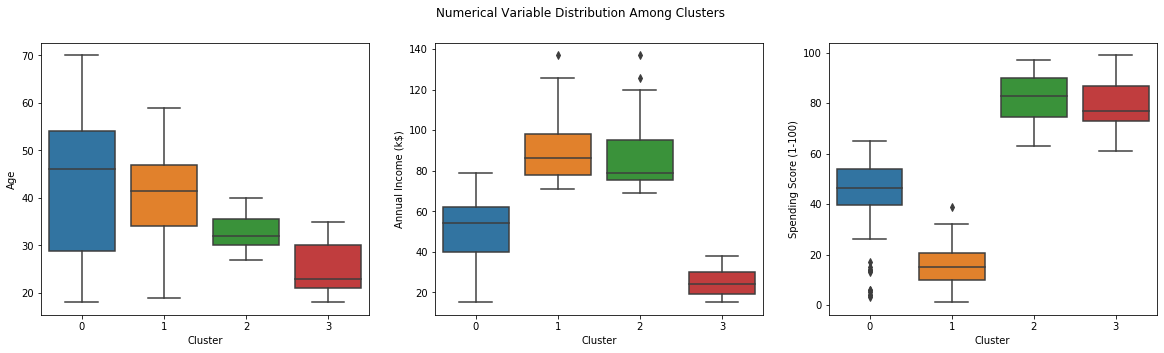

In [25]:
# Numerical variable distribution among clusters
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in range(len(cols)):
    sns.boxplot(data=data_agg, x='Cluster', y=cols[i], ax=axs[i])
fig.suptitle('Numerical Variable Distribution Among Clusters')
plt.show()

As we can notice, the clusters generated using hierarchical clustering are similar to those generated using KMeans clustering.


# Hypothesis Testing

# Checking for Association between Gender and Spending Score 

Hypothesis:
    
H0 : Gender and Spending Score are independent.

H1 : Spending Score depends on Gender.

In [26]:
cont_table= pd.crosstab(data['Gender'],data['Spending Score (1-100)'])
_,p_value,_,_=scipy.stats.chi2_contingency(cont_table,correction=True)
print(f"p-value for the test:{p_value:.4f}")

p-value for the test:0.3412


# Checking for Association between Gender and Annual Income

Hypothesis:

H0:Gender and Annual Income are independent.

H1:Annual Income depends on Gender.

In [27]:
cont_table= pd.crosstab(data['Gender'],data['Annual Income (k$)'])
_,p_value,_,_=scipy.stats.chi2_contingency(cont_table,correction=True)
print(f"p-value for the test:{p_value:.4f}")

p-value for the test:0.3495


Inference

Since the p-value > 0.05
we fail to reject the H0 hypothesis
Annual Income is independent of Gender.

# Checking the Association between Age and Spending Score

Hypothesis:
    
H0: The mean score of all Age groups is equal.

H1: At least one to mean Annual Income of Age groups differ.

In [29]:
p_value,_=scipy.stats.pearsonr(data['Age'],data['Spending Score (1-100)'])
print(f"p-value for the test:{p_value:.4f}")

p-value for the test:-0.3272


Inference

Since the p_value < 0.05 
we reject the null hypothesis
atleast one of the mean of Age Groups Spending Score differs.

# Conclusion